In [1]:
import networkx as nx
import nltk

# nltk.download()
import re

In [3]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
# tokenizer.tokenize('Eighty-seven miles to go, yet.  Onward!')

file = open('C:/Users/Admin/Desktop/Words_hyperbolic/text_file.txt',encoding="utf8")

data = file.read()

file.close()

In [4]:
data = tokenizer.tokenize(data)

In [5]:
# data

In [6]:
Freq = nltk.FreqDist(data)

In [7]:
x,y = [],[]

for i,j in Freq.items():
    
    x.append(i)
    y.append(j)

In [8]:
new_x = range(len(x))

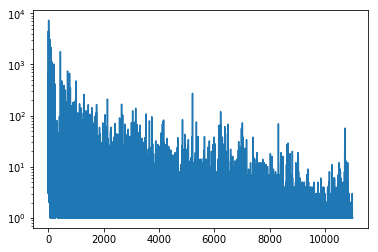

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(new_x,y)
plt.yscale('log')
plt.show()

In [10]:
data = list(map(lambda x: x.lower(), data))

data_unique = list(set(data))

In [11]:
G = nx.Graph()
G.add_nodes_from(data_unique)

In [12]:
n_dist = 1

edges = []

for i in range(len(data)):
    
    if i-n_dist < 0:
        
        print(i)
    
    else:
        edges.append((data[i],data[i-n_dist]))
    
        
    if i+n_dist >= len(data):
        
        break
    
    else:
        
        edges.append((data[i],data[i+n_dist]))
        

        
    

0


In [13]:
G.add_edges_from(edges)

In [14]:
Deg = dict(G.degree())

In [15]:
deg_dist = {}

for i,j in Deg.items():
    
    if j in deg_dist:
        
        deg_dist[j] +=1
    else:
        deg_dist[j] = 1

In [16]:
X = sorted(deg_dist.keys())
N = sum(deg_dist.values())
Y = list(map(lambda x: deg_dist[x]/N, X))

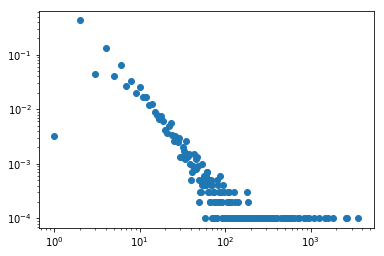

In [20]:
plt.loglog(X,Y,'o')
plt.savefig('C:/Users/Admin/Desktop/Words_hyperbolic/deg_dist_n_1_withStopwords.pdf')
plt.show()

In [27]:
nx.write_gexf(G,'C:/Users/Admin/Desktop/Untitled Folder/wordGraph_n_1.gexf')